In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from datetime import datetime
import missingno as msno
%matplotlib inline

In [40]:
data = pd.read_csv("../data/AirQualityUCI.csv", delimiter=";", decimal=",")

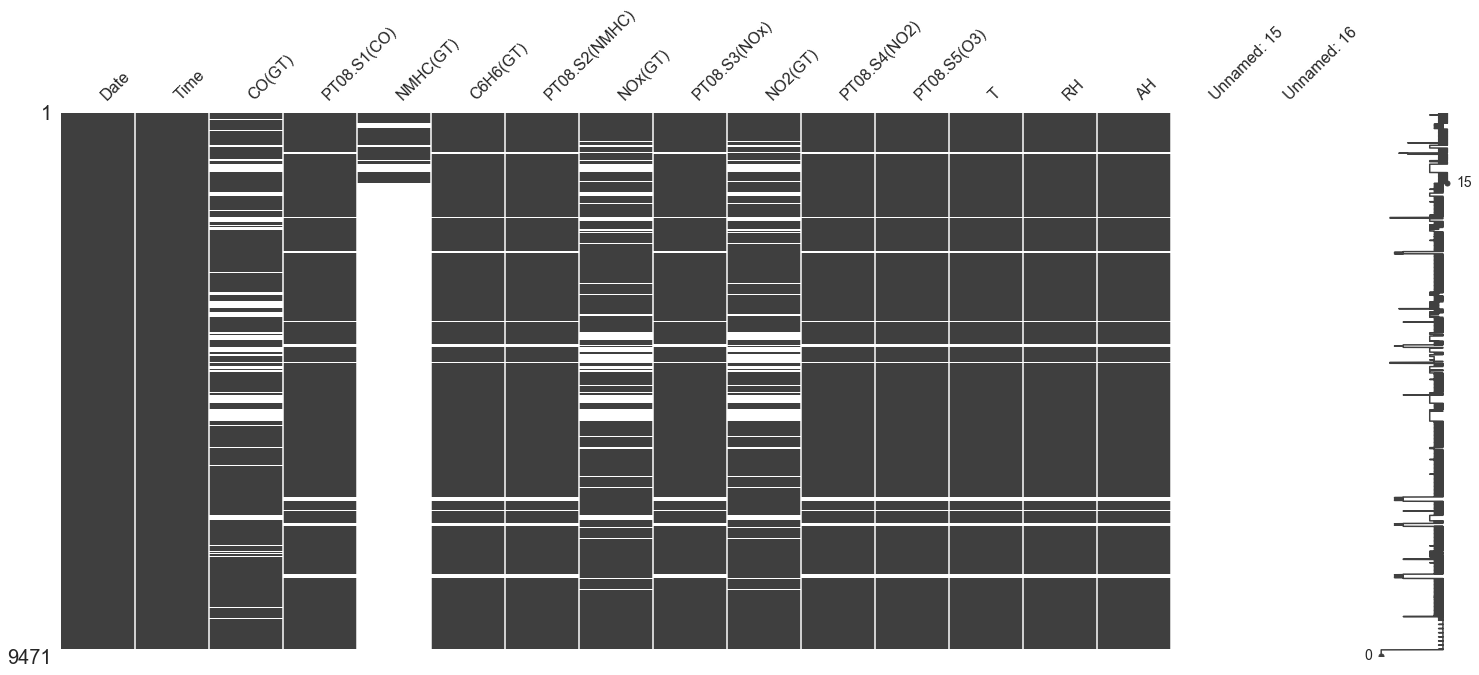

In [41]:
# Limpeza de dados
data = data.replace("-200,0", np.nan)
data = data.replace("-200", np.nan)
data = data.replace(-200, np.nan)
data = data.replace("NaN", np.nan)
msno.matrix(data)

In [42]:
# Remover coluna MNHC(GT) porque possui muitos dados em branco
data = data.drop(["NMHC(GT)"], axis=1)

# Remover as 2 ultimas colunas, não possuem dados
data = data.drop(data.columns[[14, 15]], axis=1)

# Drop todos os registros que possuem Nan
data = data.dropna()

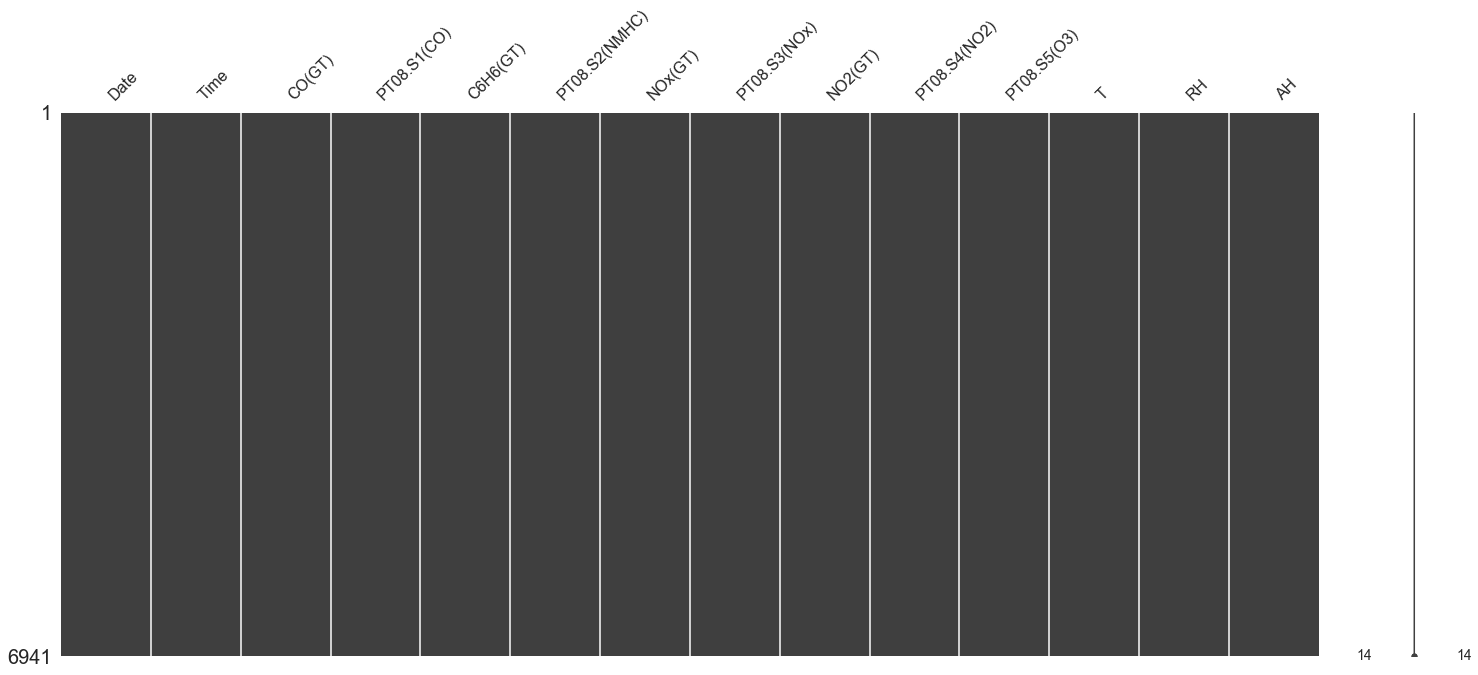

In [43]:
# Visualizar dados limpos
msno.matrix(data)

In [44]:
timeCo2 = data[['Date', 'Time', 'CO(GT)']]

In [46]:
# Formatar hora
timeCo2['f_time'] = timeCo2['Time'].str.replace('.', ':', regex=False)
timeCo2['Date'] = pd.to_datetime(timeCo2['Date'])

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
# Concatenar data e hora
timeCo2['f_date'] = timeCo2['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
timeCo2['date_time'] = pd.to_datetime(timeCo2['f_date'] + ' ' + timeCo2['f_time'])
timeCo2.sort_values(by='date_time')

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date      Time  CO(GT)    f_time      f_date           date_time
0    2004-10-03  18.00.00     2.6  18:00:00  03-10-2004 2004-03-10 18:00:00
1    2004-10-03  19.00.00     2.0  19:00:00  03-10-2004 2004-03-10 19:00:00
2    2004-10-03  20.00.00     2.2  20:00:00  03-10-2004 2004-03-10 20:00:00
3    2004-10-03  21.00.00     2.2  21:00:00  03-10-2004 2004-03-10 21:00:00
4    2004-10-03  22.00.00     1.6  22:00:00  03-10-2004 2004-03-10 22:00:00
5    2004-10-03  23.00.00     1.2  23:00:00  03-10-2004 2004-03-10 23:00:00
6    2004-11-03  00.00.00     1.2  00:00:00  03-11-2004 2004-03-11 00:00:00
7    2004-11-03  01.00.00     1.0  01:00:00  03-11-2004 2004-03-11 01:00:00
8    2004-11-03  02.00.00     0.9  02:00:00  03-11-2004 2004-03-11 02:00:00
11   2004-11-03  05.00.00     0.7  05:00:00  03-11-2004 2004-03-11 05:00:00
12   2004-11-03  06.00.00     0.7  06:00:00  03-11-2004 2004-03-11 06:00:00
13   2004-11-03  07.00.00     1.1  07:00:00  03-11-2004 2004-03-11 07:00:00
14   2004-11-03  08.00.00     2.0  08:00:00  03-11-2004 2004-03-11 08:00:00
15   2004-11-03  09.00.00     2.2  09:00:00  03-11-2004 2004-03-11 09:00:00
16   2004-11-03  10.00.00     1.7  10:00:00  03-11-2004 2004-03-11 10:00:00
17   2004-11-03  11.00.00     1.5  11:00:00  03-11-2004 2004-03-11 11:00:00
18   2004-11-03  12.00.00     1.6  12:00:00  03-11-2004 2004-03-11 12:00:00
19   2004-11-03  13.00.00     1.9  13:00:00  03-11-2004 2004-03-11 13:00:00
20   2004-11-03  14.00.00     2.9  14:00:00  03-11-2004 2004-03-11 14:00:00
21   2004-11-03  15.00.00     2.2  15:00:00  03-11-2004 2004-03-11 15:00:00
22   2004-11-03  16.00.00     2.2  16:00:00  03-11-2004 2004-03-11 16:00:00
23   2004-11-03  17.00.00     2.9  17:00:00  03-11-2004 2004-03-11 17:00:00
24   2004-11-03  18.00.00     4.8  18:00:00  03-11-2004 2004-03-11 18:00:00
25   2004-11-03  19.00.00     6.9  19:00:00  03-11-2004 2004-03-11 19:00:00
26   2004-11-03  20.00.00     6.1  20:00:00  03-11-2004 2004-03-11 20:00:00
27   2004-11-03  21.00.00     3.9  21:00:00  03-11-2004 2004-03-11 21:00:00
28   2004-11-03  22.00.00     1.5  22:00:00  03-11-2004 2004-03-11 22:00:00
29   2004-11-03  23.00.00     1.0  23:00:00  03-11-2004 2004-03-11 23:00:00
30   2004-12-03  00.00.00     1.7  00:00:00  03-12-2004 2004-03-12 00:00:00
31   2004-12-03  01.00.00     1.9  01:00:00  03-12-2004 2004-03-12 01:00:00
...         ...       ...     ...       ...         ...                 ...
9326 2005-03-04  08.00.00     0.7  08:00:00  04-03-2005 2005-04-03 08:00:00
9327 2005-03-04  09.00.00     1.2  09:00:00  04-03-2005 2005-04-03 09:00:00
9328 2005-03-04  10.00.00     1.4  10:00:00  04-03-2005 2005-04-03 10:00:00
9329 2005-03-04  11.00.00     1.3  11:00:00  04-03-2005 2005-04-03 11:00:00
9330 2005-03-04  12.00.00     1.4  12:00:00  04-03-2005 2005-04-03 12:00:00
9331 2005-03-04  13.00.00     1.0  13:00:00  04-03-2005 2005-04-03 13:00:00
9332 2005-03-04  14.00.00     1.0  14:00:00  04-03-2005 2005-04-03 14:00:00
9333 2005-03-04  15.00.00     1.1  15:00:00  04-03-2005 2005-04-03 15:00:00
9334 2005-03-04  16.00.00     1.3  16:00:00  04-03-2005 2005-04-03 16:00:00
9335 2005-03-04  17.00.00     1.4  17:00:00  04-03-2005 2005-04-03 17:00:00
9336 2005-03-04  18.00.00     1.2  18:00:00  04-03-2005 2005-04-03 18:00:00
9337 2005-03-04  19.00.00     2.7  19:00:00  04-03-2005 2005-04-03 19:00:00
9338 2005-03-04  20.00.00     2.5  20:00:00  04-03-2005 2005-04-03 20:00:00
9339 2005-03-04  21.00.00     1.5  21:00:00  04-03-2005 2005-04-03 21:00:00
9340 2005-03-04  22.00.00     1.6  22:00:00  04-03-2005 2005-04-03 22:00:00
9341 2005-03-04  23.00.00     1.2  23:00:00  04-03-2005 2005-04-03 23:00:00
9342 2005-04-04  00.00.00     0.9  00:00:00  04-04-2005 2005-04-04 00:00:00
9343 2005-04-04  01.00.00     0.6  01:00:00  04-04-2005 2005-04-04 01:00:00
9344 2005-04-04  02.00.00     0.5  02:00:00  04-04-2005 2005-04-04 02:00:00
9345 2005-04-04  03.00.00     0.4  03:00:00  04-04-2005 2005-04-04 03:00:00
9347 2005-04-04  05.00.00     0.5  05:00:00  04-04-2005 200

In [48]:
groupByHour = timeCo2.groupby(['Time'])
groupByHour['CO(GT)'].median()

# Criar dataframe com os valores medios de CO2 agrupados por hora
dfCO2_Hour = pd.DataFrame(groupByHour['CO(GT)'].median().reset_index(name = 'CO(GT)'))

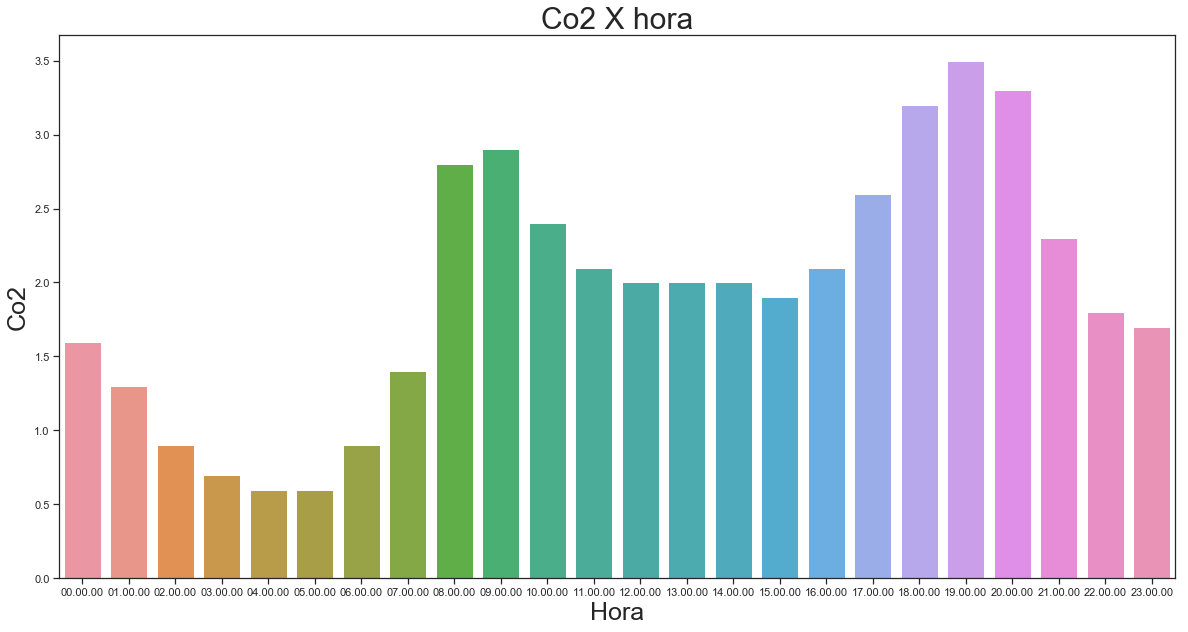

In [53]:
plt.figure(figsize=(20,10))

sns.barplot(x="Time", y="CO(GT)", data=dfCO2_Hour);

plt.title('Co2 X hora', fontsize=30)
plt.ylabel('Co2', fontsize=25)
plt.xlabel('Hora', fontsize=25)
plt.show()

In [50]:
# Sim. Conforme o gráfico, é possível observar que o nível de Co2 tem 2 picos, primeiro por volta das 8 horas 
# e o segundo por volta das 19 horas. Que são os dois horários picos de transito.